### Load tensorflow

In [28]:
import tensorflow as tf
import numpy as np

### Collect Data

We will use MNIST dataset for this exercise. This dataset contains images of hand written numbers with each image being a black & white picture of size 28x28. We will download the data using tensorflow API. The dataset has 60,000 training examples and 10,000 test examples. Please note that images have already been converted to numpy arrays.

In [29]:
#Download dataset
(trainX, trainY),(testX, testY) = tf.keras.datasets.mnist.load_data()

In [30]:
#Check number of training examples and size of each example
trainX.shape

(60000, 28, 28)

In [31]:
print('total pixel:',trainX.shape[2]**2)

total pixel: 784


In [32]:
#Check number of test examples and size of each example
testX.shape

(10000, 28, 28)

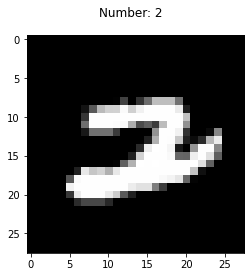

In [33]:
#Let's review the data
import matplotlib.pyplot as plt
img_num = np.random.randint(0, testX.shape[0]) #Get a random integer between 0 and number of examples in test dataset
plt.imshow(testX[img_num],cmap='gray') #Show the image from test dataset
plt.suptitle('Number: ' + str(testY[img_num]))
plt.show()

### Convert Output label to multiple values

In [34]:
#Check current label size
testY[0]

7

In [35]:
#Convert labels to one hot encoding
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [36]:
#Now check the label size
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Build the Graph

In [37]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

## Build the Graph
We will build a model with 4 hidden layers. Number of neurons in hidden layer will be 200, 100, 60 and 30 respectively. Both number of hidden layers and number of neurons in each hidden layer are hyperparameters *i.e* you can change these values to improve the model. Output of each neuron in hidden layer will be passed through an activation function.

In [38]:
#Add 1st hidden layer
# 200 Nerurons
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))

In [39]:
#Add 2nd hidden layer
# 100 Nerurons
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [40]:
#Add 3rd hidden layer
# 60 Nerurons
model.add(tf.keras.layers.Dense(60, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [41]:
#Add 4th hidden layer
# 30 Nerurons
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

In [42]:
#Add OUTPUT layer
# 10 Neurons
model.add(tf.keras.layers.Dense(10, activation='softmax'))

## Build the Graph...

In [43]:
#Compile the model
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.02, momentum=0.8, nesterov=True)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Review model

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6

## Train the model

In [45]:
# Store the model in mnist_v1.h5
mckpt = tf.keras.callbacks.ModelCheckpoint('mnist_v1.h5', 
                                           monitor='val_accuracy', save_best_only=True, verbose=1)

In [47]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=40,
          batch_size=32, 
          callbacks = [mckpt])
# Using batch for low memory or have lager number of inputs (10000000)
# batch size should not be tooo low.

Epoch 1/40
1864/1875 [============================>.] - ETA: 0s - loss: 0.3022 - accuracy: 0.9148
Epoch 00001: val_accuracy improved from 0.95280 to 0.96090, saving model to mnist_v1.h5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3019 - accuracy: 0.9150 - val_loss: 0.1634 - val_accuracy: 0.9609
Epoch 2/40
1865/1875 [============================>.] - ETA: 0s - loss: 0.2575 - accuracy: 0.9271
Epoch 00002: val_accuracy improved from 0.96090 to 0.96350, saving model to mnist_v1.h5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2571 - accuracy: 0.9272 - val_loss: 0.1604 - val_accuracy: 0.9635
Epoch 3/40
1873/1875 [============================>.] - ETA: 0s - loss: 0.2262 - accuracy: 0.9371
Epoch 00003: val_accuracy improved from 0.96350 to 0.96710, saving model to mnist_v1.h5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2262 - accuracy: 0.9371 - val_loss: 0.2154 - val_accuracy: 0.9671
Epoch 4/40
1870/1875 [====================

1874/1875 [============================>.] - ETA: 0s - loss: 0.1027 - accuracy: 0.9711
Epoch 00028: val_accuracy improved from 0.97920 to 0.97980, saving model to mnist_v1.h5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1026 - accuracy: 0.9711 - val_loss: 0.1437 - val_accuracy: 0.9798
Epoch 29/40
1874/1875 [============================>.] - ETA: 0s - loss: 0.1034 - accuracy: 0.9712
Epoch 00029: val_accuracy improved from 0.97980 to 0.98010, saving model to mnist_v1.h5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1034 - accuracy: 0.9711 - val_loss: 0.1379 - val_accuracy: 0.9801
Epoch 30/40
1875/1875 [==============================] - ETA: 0s - loss: 0.0979 - accuracy: 0.9722
Epoch 00030: val_accuracy did not improve from 0.98010
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0979 - accuracy: 0.9722 - val_loss: 0.1125 - val_accuracy: 0.9785
Epoch 31/40
1870/1875 [============================>.] - ETA: 0s - loss: 0.0994 - acc

In [48]:
model.save('mnist_sgd_nm.h5')
# Saving model. Model has adjusted weights and bias with model structure.

In [50]:
model = tf.keras.models.load_model('mnist_v1.h5')

In [51]:
tf.keras.models.save_model(model, 'mnist_v2.h5', include_optimizer=False)

In [53]:
189076*4*3

2268912

In [94]:
len(model.get_weights()[0])

784

In [98]:
sum(model.get_weights()[0])

768.0169150233269

In [62]:
model.get_weights()

[array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.99638355, 1.0018789 , 0.99905705,
        1.0002233 , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.9994614 , 1.0004623 , 1.0058125 ,
        1.0089374 , 0.9884647 , 1.0060672 , 0.99892133, 1.0010065 ,
        1.0242969 , 0.9928925 , 1.0354102 , 1.0629761 , 1.0126883 ,
        1.0289841 , 0.99172884, 1.0069382 , 1.0007396 , 0.9968633 ,
        1.0036259 , 1.0019397 , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.0006298 , 1.0060841 ,
        1.0028188 , 1.0032953 , 1.010071  , 0.987432  , 1.0921429 ,
        1.0849533 , 1.055189  , 1.0631005 , 1.0059955 , 0.90569216,
        1.0880271 , 1.0295091 , 1.03358   , 0.97

In [56]:
#Save the model in current directory
model.save('mnist_dnn_v1.h5')

### Downloading the model on local machine from google colab

In [64]:
# from google.colab import files
# files.download('mnist_dnn_v1.h5')

### Model Prediction

In [144]:
import numpy as np

In [145]:
#Check if model is available in current directory
# !ls -l

In [146]:
#Load the model in memory
model = tf.keras.models.load_model('mnist_dnn_v1.h5')

In [147]:
#Review the model (optional)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6

In [148]:
#What should be the shape of model input
model.input

<tf.Tensor 'reshape_input_4:0' shape=(None, 28, 28) dtype=float32>

In [149]:
#Shape of each example in test dataset
testX[0].shape

(28, 28)

In [150]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [151]:
#Make it 3 dimension data
input_data = np.expand_dims(testX[0], axis=0)
input_data.shape

(1, 28, 28)

In [152]:
#Model prediction
pred = model.predict(input_data)
pred

array([[2.56858812e-10, 4.86474562e-07, 7.16712876e-08, 1.33716485e-05,
        8.95649421e-08, 1.80825765e-07, 1.09909009e-11, 9.99975324e-01,
        2.01880439e-07, 1.02019540e-05]], dtype=float32)

In [153]:
#Model prediction shape
pred.shape

(1, 10)

In [154]:
#Model prediction for first example
pred[0]

array([2.56858812e-10, 4.86474562e-07, 7.16712876e-08, 1.33716485e-05,
       8.95649421e-08, 1.80825765e-07, 1.09909009e-11, 9.99975324e-01,
       2.01880439e-07, 1.02019540e-05], dtype=float32)

In [163]:
max = 0
for i in pred[0]:
    if max<i:
        max = i

for i,pre in enumerate(pred[0]):
    if max == pre:
        print(i)
        break

7


In [164]:
print(testY[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [156]:
#Find the index of highest probability value
np.argmax(pred[0])

7

In [157]:
#Actual label # Which index of the list have the highest value.
np.argmax(testY[0])

7

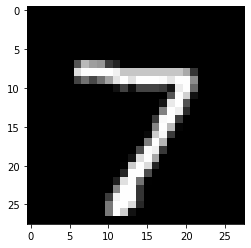

In [158]:
#Lets print the image as well
import matplotlib.pyplot as plt
plt.imshow(testX[0],cmap='gray')